<p hidden>$
\newcommand{\phm}{\phantom{-}}
\newcommand{\vb}{\underline{\mathbf{b}}}
\newcommand{\vf}{\underline{\mathbf{f}}}
\newcommand{\vk}{\underline{\mathbf{k}}}
\newcommand{\vx}{\underline{\mathbf{x}}}
\newcommand{\vy}{\underline{\mathbf{y}}}
\newcommand{\deriv}[3][]{\frac{\mathrm{d}^{#1}#2}{\mathrm{d}#3^{#1}}}
\newcommand{\partderiv}[3][]{\frac{\partial^{#1}#2}{\partial#3^{#1}}}
\newcommand{\intd}{\,\mathrm{d}}
\newcommand{\rmd}{\mathrm{d}}
\DeclareMathOperator{\Uniform}{Uniform}
\DeclareMathOperator{\Poisson}{Poisson}
\DeclareMathOperator{\Normal}{Normal}
\DeclareMathOperator{\Exponential}{Exponential}
\DeclareMathOperator{\GammaDist}{Gamma}
\DeclareMathOperator{\Prob}{P}
\DeclareMathOperator{\Exp}{E}
\DeclareMathOperator{\Var}{Var}
$</p>

# Lab 5: Interpolation and Approximation

### Topics

- **Mathematics:** polynomial interpolation; divided difference tables.
- **Python:** more practice with input and output arguments for functions; NumPy's interpolation and regression tools; nested for loops; plotting functions alongside data.

In [1]:
import numpy as np
from numpy.polynomial import Polynomial
np.set_printoptions(linewidth=130, suppress=True) #set the line width so wider arrays don't get wrapped

%matplotlib notebook
import matplotlib.pyplot as plt

## Preparation

Read your lecture notes.  See also Chapra and Canale's account of divided differences and polynomial interpolation.
In this lab you will work through two of their exercises about engineering applications of interpolation.

## NumPy's polynomial fitting

In the first part of this lab we will be using NumPy's polynomial fitting class, `numpy.polynomial.Polynomial`, through the `Polynomial.fit` function.  It is used like this:
```
p = Polynomial.fit(x, y, deg, domain)
```
Here `x` and `y` are arrays containing the $x$- and $y$-coordinates of the data to fit to, `deg` is the degree of the polynomial you want, and `domain`, which is optional, is an interval of where the polynomial is to be evaluated.  The variable you get back, `p` here, is a representation of the polynomial, and can be used to evaluate it at $x$ values you choose with `p(x)`, or at a range of `n` values with `x0, y0 = p.linspace(n)` or `x0, y0 = p.linspace(n, domain)`.  `p.linspace` returns arrays of $x$ and $y$ values representing points on the polynomial.

For example:

p(1.5) = 0.8750000000000001


<IPython.core.display.Javascript object>


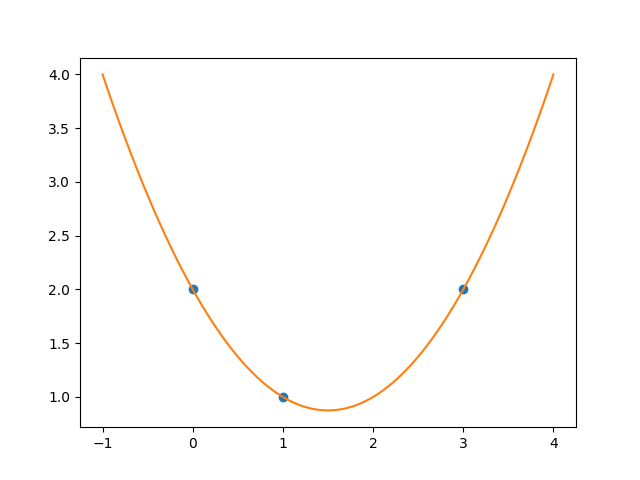

In [12]:
x = np.array([0., 1., 3.])
y = np.array([2., 1., 2.])
p = Polynomial.fit(x, y, deg=2, domain=[-1., 4.])
print(f'p(1.5) = {p(1.5)}')

fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.plot(*p.linspace(200));

## Linear interpolation

Polynomial interpolation is used to estimate function values between precise data points.

Dynamic viscosity of water ($\mu$) is related to temperature ($T$) in the following manner.

<center>
  <table>
    <tbody>
      <tr style="text-align: center;">
        <td style="width: 150px;">$T$ ($^\circ\mathrm{C}$)</td>
        <td>0</td><td>5</td><td>10</td><td>20</td><td>30</td><td>40</td>
      </tr>
      <tr>
        <td style="width: 150px;">$\mu$ ($\times 10^{-3} \mathrm{N}\mathrm{s}\mathrm{m}^{-2}$)</td>
        <td>1.787</td><td>1.519</td><td>1.307</td><td>1.002</td><td>0.7975</td><td>0.6529</td>
      </tr>
    </tbody>
  </table>
</center>

1. How many data points are needed to construct a linear interpolation polynomial?
2. Choose the appropriate points from the above table and use linear interpolation with `p1 = Polynomial.fit(...)` to find the approximate value of $\mu$ at $T=7.5\,^\circ\mathrm{C}$.
3. Using the same polynomial you fit in Question 2, plot the linear polynomial you have just used (use `p1.linspace`), along with *all* the data points.  Make sure that your plot agrees with your answer to Question 2.

1.4129999999999994


<IPython.core.display.Javascript object>


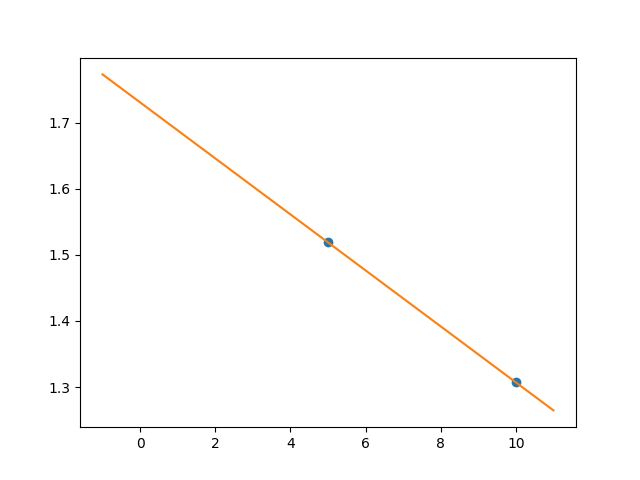

In [5]:
x = np.array([5., 10.])
y = np.array([1.519, 1.307])
p1 = Polynomial.fit(x, y, deg=1, domain=[-1., 11.])
print(p1(7.5))
fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.plot(*p1.linspace(200));

## Higher degree interpolation

4. How many data points are needed to construct a quadratic interpolation polynomial?  Choose the appropriate points from the above table using indexing, and use quadratic interpolation to find the approximate value of $\mu$ at $T=7.5\,^\circ\mathrm{C}$.
5. Plot the quadratic approximation found in Question 4, along with all the data points.
6. Repeat Questions 4-5 using interpolation polynomials of degree 3, 4 and 5.

**Hint:** You could store your polynomials in a dictionary with the degree as the key, so `p[1]` would be the degree 1 polynomial, etc.  This makes it easy to keep track of them and do things with them in loops.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 1</h3>

  What is your value for $\mu$ at $T=7.5\,^\circ\mathrm{C}$?  For what range of $T$ values would you expect the quadratic interpolation polynomial to give a good estimate for $\mu$?
</div>

Degree 1 𝜇 interpolated at T = 7.5 : 1.4129999999999998


<IPython.core.display.Javascript object>


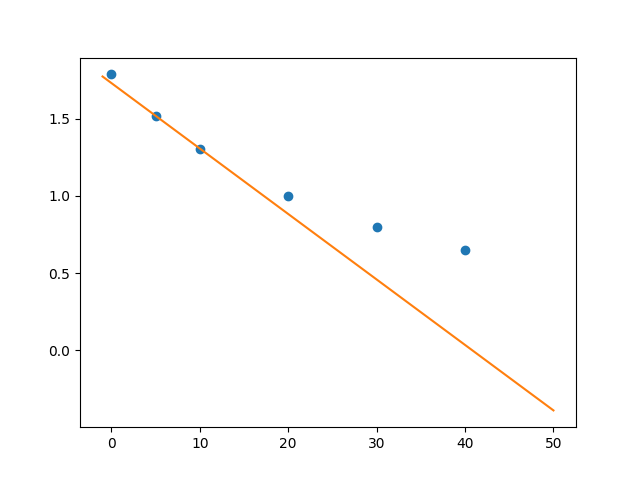

Degree 2 𝜇 interpolated at T = 7.5 : 1.4059999999999986


<IPython.core.display.Javascript object>


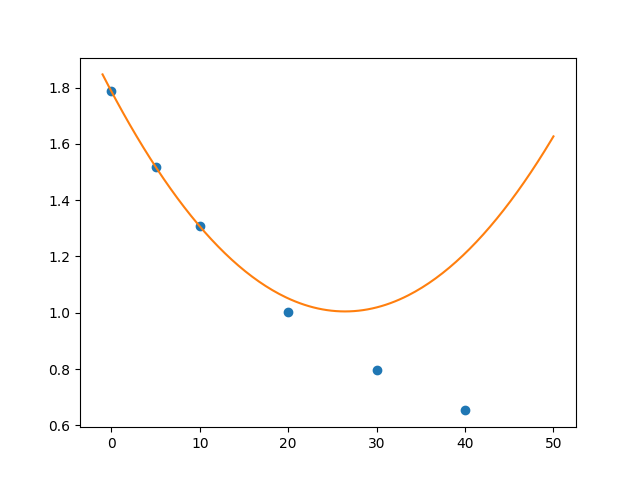

Degree 3 𝜇 interpolated at T = 7.5 : 1.406765625000001


<IPython.core.display.Javascript object>


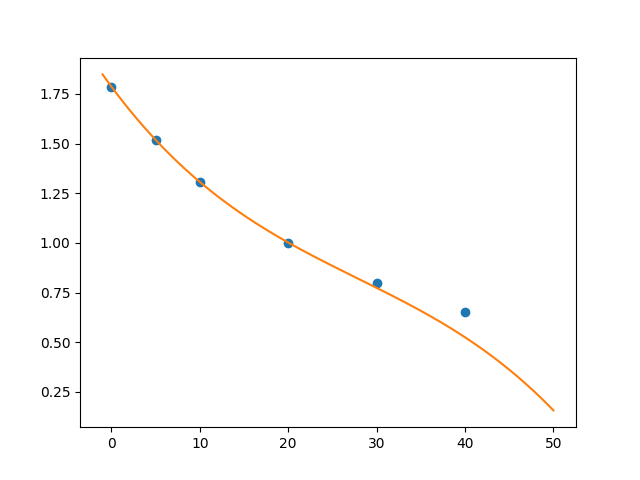

Degree 4 𝜇 interpolated at T = 7.5 : 1.4068574218749994


<IPython.core.display.Javascript object>


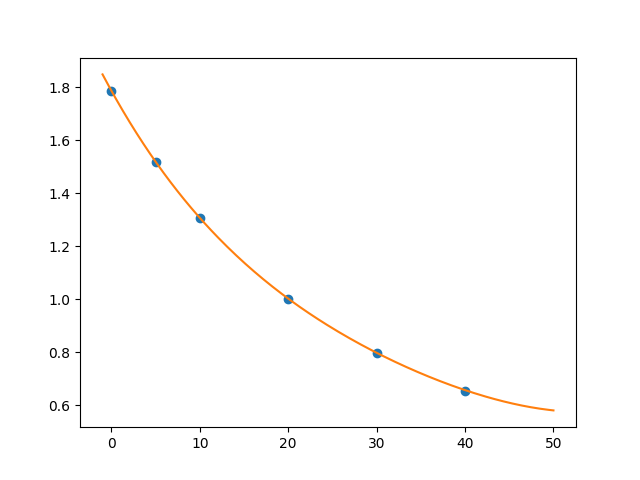

Degree 5 𝜇 interpolated at T = 7.5 : 1.4068632289341525


<IPython.core.display.Javascript object>


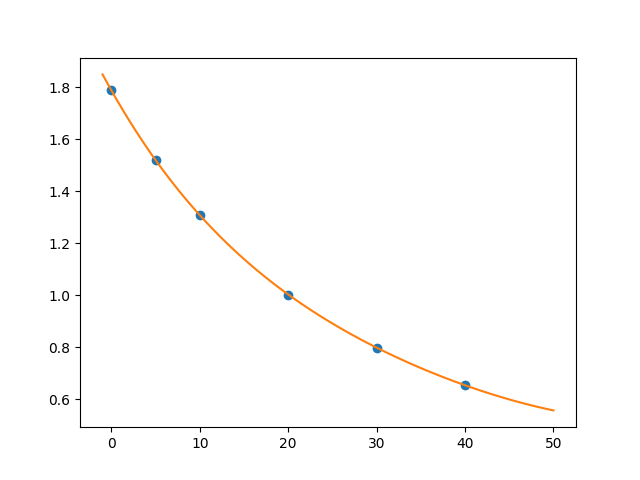

In [8]:

# We expect the range our quadratic approximation can give a good estimate is [0, 10]
x = [0, 5, 10, 20, 30, 40]
y = [1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529]
polynomial_dict = {}
polynomial_dict[1] = Polynomial.fit(x[1:3], y[1:3], deg=1, domain=[-1., 50.])
for i in range(3, len(x)+1):
    polynomial_dict[i-1] = Polynomial.fit(x[:i], y[:i], deg=i-1, domain =[-1., 50.])

for i in range(len(polynomial_dict)):
    print(f"Degree {i+1} 𝜇 interpolated at T = 7.5 : {polynomial_dict[i+1](7.5)}")
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o')
    ax.plot(*polynomial_dict[i+1].linspace(200));


## Interpolation and approximation for noisy data

If there are significant errors in your data, it's not usually a good idea to use interpolation, which actually goes through the data points.  In such cases we use least squares regression: instead of looking for a straight line (say) that passes through just two points, we look for a line that passes as close as possible to all the data points at the same time.

The following table shows shows rainfall data for the catchment of a river, and flow data for the river itself.  We would like to predict the river flow if the rainfall was $120\mathrm{mm}$.

<center>
  <table>
    <tbody>
      <tr>
        <td style="width: 120px;">Rainfall ($\mathrm{mm}$)</td>
        <td>88.9</td><td>94</td><td>99.1</td><td>104.1</td><td>108.5</td><td>116.8</td><td>127</td><td>139.7</td>
      </tr>
      <tr>
        <td style="width: 120px;">Flow ($\mathrm{m}^3\mathrm{s}^{-1}$)</td>
        <td>14.6</td><td>16.1</td><td>16.6</td><td>15.3</td><td>16.7</td><td>18.1</td><td>19.5</td><td>23.2</td>
      </tr>
    </tbody>
  </table>
</center>


`numpy.polynomial.Polynomial` can do approximation as well as interpolation, and that is what it will do if you ask for a degree less than $n-1$, where $n$ is the number of points you give it (you may have seen this behaviour accidentally already!).

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 2</h3>

  Use this to find the straight line which gives the best fit to the data points.  Use this line to calculate an estimate for the river flow if the rainfall was $120\mathrm{mm}$.
  
  Plot the data points, straight line, and approximation at $120\mathrm{mm}$ together.
</div>

<IPython.core.display.Javascript object>


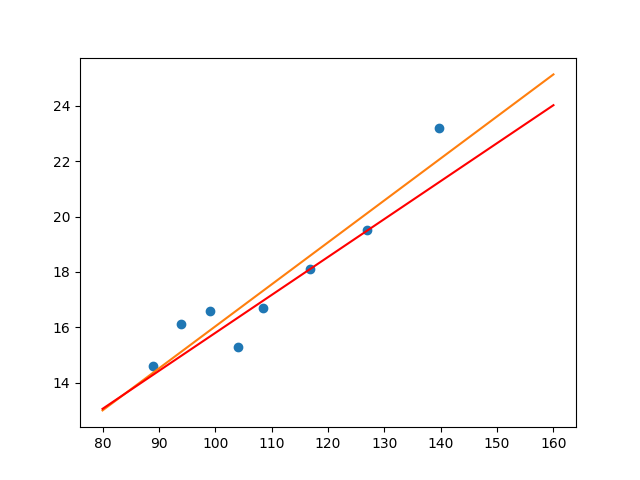

Best fit approximation: 19.067277193917192
Two points approximation: 18.539215686274506


In [9]:
x = [88.9,94,99.1,104.1,108.5,116.8,127,139.7]
y = [14.6,16.1,16.6,15.3,16.7,18.1,19.5,23.2]
p_approximation = Polynomial.fit(x, y, deg=1, domain=[80, 160])
p_line = Polynomial.fit([116.8, 127] ,[18.1, 19.5], deg=1, domain=[80, 160])
fig, ax = plt.subplots()
print(f"Best fit approximation: {p_approximation(120)}")
print(f"Two points approximation: {p_line(120)}")
ax.plot(x, y, 'o')
ax.plot(*p_approximation.linspace(200));
ax.plot(*p_line.linspace(200),'r');

## Table of divided differences

In this task you are to write a function `div_diff` which will construct the table of divided differences for any set of $n$ data points:
```
def div_diff(x, f):
    ...
    return table
```
`x` and `f` are $n$-dimensional vectors of $x$ values and function values respectively.  `table` is an $n \times n$ array of divided differences (with `f` in the first column).

To help you do this, here is a diagram and mathematical formulas for calculating $A_{i,j}$, the $(i,j)$ entry in the table of divided differences.  Note that, although all 2D arrays in NumPy must be rectangular, only the upper-left half of `table` is actually used.  Think carefully about the order in which you will calculate the entries in `table`, and the starting and finishing values for $i$ and $j$ in your for loops (the finishing value is not always the same).

Remember that your function doesn't know in advance how many data points there are, so you will need to use the `len` command to find out the number of entries in `x`.

<center>
<table>
    <tbody>
        <tr>
            <td></td><td></td><td colspan="6" style="text-align: left;">$j$ →</td>
        </tr>
        <tr>
            <td></td><td style="width: 40px; text-align: left;">$\vx$</td><td colspan="6" style="text-align: left;"><code>table</code> ($A$)</td>
        </tr>
        <tr>
            <td style="width: 20px;">$i$</td><td style="text-align: left;">*</td><td style="text-align: left;">*</td><td>*</td><td>*</td><td>*</td><td>*</td><td>*</td>
        </tr>
        <tr>
            <td>↓</td><td style="text-align: left;">*</td><td style="text-align: left;">*</td><td>*</td><td>*</td><td>*</td><td>*</td>
        </tr>
        <tr>
            <td></td><td style="text-align: left;">*</td><td style="text-align: left;">*</td><td>*</td><td>*</td><td>*</td>
        </tr>
        <tr>
            <td></td><td style="text-align: left;">*</td><td style="text-align: left;">*</td><td>*</td><td>*</td>
        </tr>
        <tr>
            <td></td><td style="text-align: left;">*</td><td style="text-align: left;">*</td><td>*</td>
        </tr>
        <tr>
            <td></td><td style="text-align: left;">*</td><td style="text-align: left;">*</td>
        </tr>
    </tbody>
</table>
</center>

$$
  A_{i,0} = f_i, \qquad  A_{i,j}= \frac{A_{i+1,j-1}-A_{i,j-1}}{x_{i+j}-x_i}\ \mathrm{for}\ j > 0,
$$

where $A$ is the table your function produces, indexed from $0$ like Python.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 3</h3>

  Use your program to calculate the table of divided differences for the viscosity–temperature data given above.
</div>

In [10]:
def div_diff(x, f):
    A = np.zeros((len(x), len(x)), dtype=float)
    for i in range(len(x)):
        A[i, 0] = f[i]
        
    for i in range(len(x)):
        k = len(x)-1-i
        for j in range(i+1):
            if j > 0:
                A[k, j] = (A[k+1, j-1] - A[k, j-1])/(x[k+j]-x[k])
    
    return A

x = [88.9,94,99.1,104.1,108.5,116.8,127,139.7]
y = [14.6,16.1,16.6,15.3,16.7,18.1,19.5,23.2]
A = div_diff(x, y)
print(A)
        
    

[[14.6         0.29411765 -0.01922338 -0.0010675   0.00039563 -0.0000312   0.00000133 -0.00000004]
 [16.1         0.09803922 -0.03544943  0.00668677 -0.00047487  0.00001936 -0.00000051  0.        ]
 [16.6        -0.26        0.0615087  -0.00414016  0.00016416 -0.00000416  0.          0.        ]
 [15.3         0.31818182 -0.01177221  0.00043991 -0.00000477  0.          0.          0.        ]
 [16.7         0.1686747  -0.00169837  0.00027009  0.          0.          0.          0.        ]
 [18.1         0.1372549   0.00672855  0.          0.          0.          0.          0.        ]
 [19.5         0.29133858  0.          0.          0.          0.          0.          0.        ]
 [23.2         0.          0.          0.          0.          0.          0.          0.        ]]


## Evaluating the polynomial with divided differences

Finally, we will evaluate the polynomial that we fit with the divided difference table.  Write a function `div_diff_eval` that evaluates the interpolating polynomial with coefficients from your divided difference table:
```
def div_diff_eval(x, table, x0):
    total = np.zeros_like(x0)
    ...
    return total
```
Here `x` is the array of $x$ values you have data for, `table` is the divided difference table calculated with `div_diff`, and `x0` is where to evaluate the polynomial.  Using `np.zeros_like` will make it easy to write a function that can take in either a single number `x0` or an array `x0`.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 4</h3>

  Test your <code>div_diff_eval</code> function by using it to interpolate through the viscosity–temperature data points and plotting the results.  Does evaluating your new polynomial at 7.5 agree with your estimates above?
</div>

Y Array:
[1.787  1.519  1.307  1.002  0.7975 0.6529]
div_diff_eval evaluated with divided differences of x and y and x0=x:
[1.787  1.519  1.307  1.002  0.7975 0.6529]


<IPython.core.display.Javascript object>


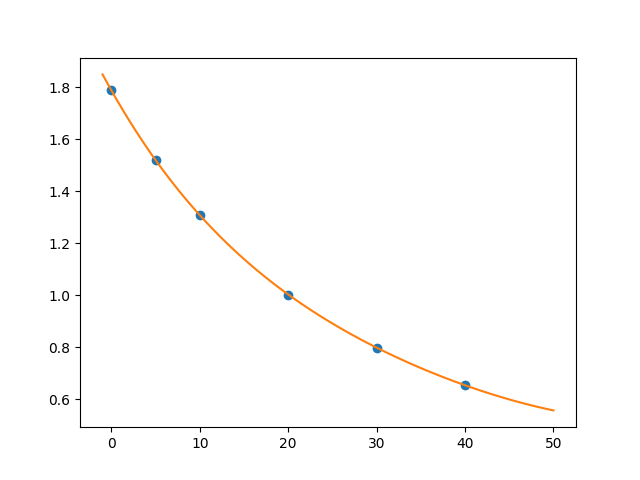

Evaluating x0 = 7.5 in our polynomial:
1.4068632289341516
Evaluating x0 = 7.5 in Numpy polynomial:
1.4068632289341525


In [11]:
def div_diff_eval(x, table, x0):
    total = np.zeros_like(x0)
    coefficients = table[0, :]
    total += table[0, 0]
    for i in range(1, len(x)):
        m = 1
        for j in range(i):
            m *= x0 - x[j]
        total += m*coefficients[i]
        
    
    return total

x = np.array([0., 5., 10., 20., 30., 40.])
y = np.array([1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529])
A = div_diff(x, y)
results = div_diff_eval(x, A, x)
print("Y Array:")
print(y)
print("div_diff_eval evaluated with divided differences of x and y and x0=x:")
print(results)
fig, ax = plt.subplots()
ax.plot(x, results, 'o')
p = Polynomial.fit(x, y, deg=5, domain=[-1., 50.])
ax.plot(*p.linspace(200))
print("Evaluating x0 = 7.5 in our polynomial:")
print(div_diff_eval(x, A, 7.5))
print("Evaluating x0 = 7.5 in Numpy polynomial:")
print(p(7.5))